In [18]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [19]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [20]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import inspect
from sqlalchemy import create_engine, func
from datetime import date, timedelta


In [21]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [22]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)


In [23]:
# View all of the classes that automap found
Base.classes.keys()


['measurement', 'station']

In [24]:
# Save references to each table
station = Base.classes.station
measurement = Base.classes.measurement

In [25]:
# Create our session (link) from Python to the DB
session = Session(bind=engine)


# Exploratory Precipitation Analysis

In [26]:
# Find the most recent date in the data set.
recent_date = session.query(measurement.date).order_by(measurement.date.desc()).first()
recent_date

('2017-08-23',)

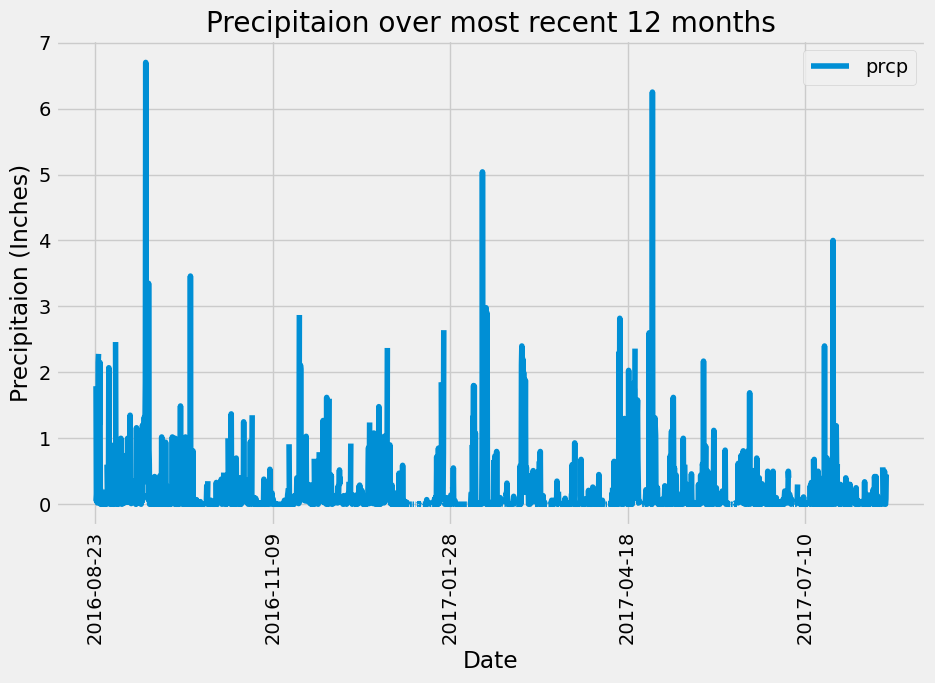

In [27]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
one_year_from_recent = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# # Perform a query to retrieve the data and precipitation scores
date_prcp = session.query(measurement.date,measurement.prcp).filter(measurement.date >= one_year_from_recent).all()
date_prcp   
# # Save the query results as a Pandas DataFrame and set the index to the date column
prcp_df = pd.DataFrame(date_prcp, columns=["date", "prcp"])
prcp_df.set_index("date", inplace=True)

# # Sort the dataframe by date
sorted_df = prcp_df.sort_values("date")
sorted_df
# # Use Pandas Plotting with Matplotlib to plot the data
sorted_df.plot( rot=90, figsize=(10, 6))
plt.xlabel('Date')
plt.ylabel('Precipitaion (Inches)')
plt.title("Precipitaion over most recent 12 months")
plt.show()


In [28]:
# Use Pandas to calcualte the summary statistics for the precipitation data
summary_statistics = sorted_df.describe()
print(summary_statistics)

              prcp
count  2021.000000
mean      0.177279
std       0.461190
min       0.000000
25%       0.000000
50%       0.020000
75%       0.130000
max       6.700000


# Exploratory Station Analysis

In [29]:
# Design a query to calculate the total number stations in the dataset
count = session.query(measurement.station).distinct().count()
count

9

In [30]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
station_counts = session.query(measurement.station, func.count(measurement.station)).group_by(
    measurement.station).order_by(func.count(measurement.station).desc()).all()
station_counts

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [31]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active = station_counts[0][0]
temp_results = session.query(func.min(measurement.tobs), func.max(
    measurement.tobs), func.avg(measurement.tobs)).filter(measurement.station == most_active).all()
temp_results

print(f"The most active station is {most_active}.")
print(f"The lowest temperature is {temp_results[0][0]}.")
print(f"The highest temperature is {temp_results[0][1]}.")
print(f"The average temperature is {temp_results[0][2]}.")


The most active station is USC00519281.
The lowest temperature is 54.0.
The highest temperature is 85.0.
The average temperature is 71.66378066378067.


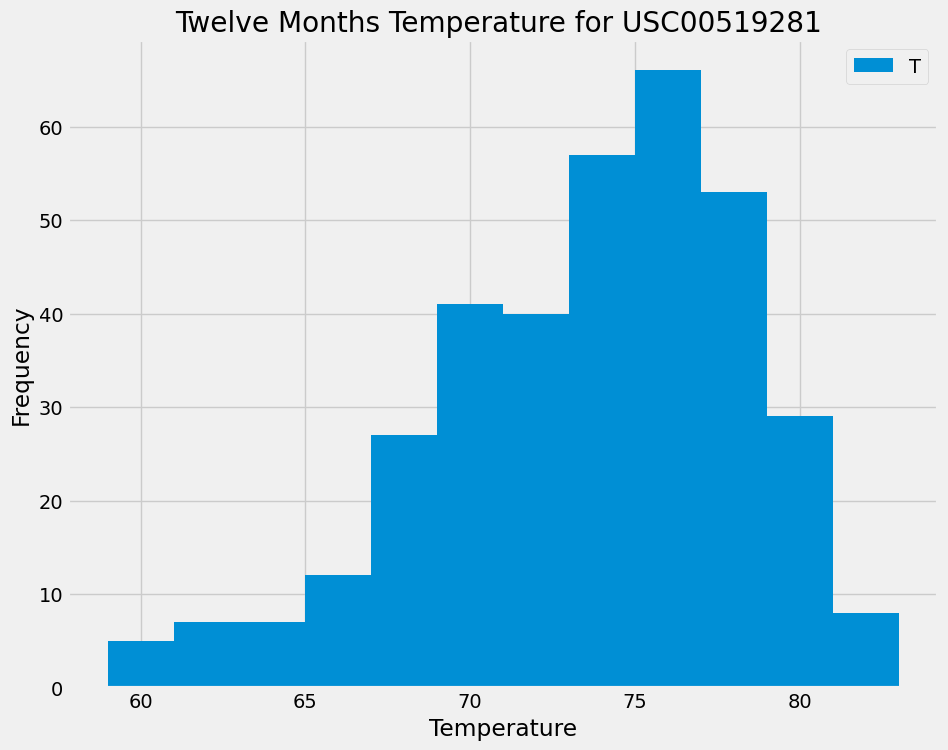

In [32]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_obs = session.query(measurement.station,measurement.tobs).filter(
    measurement.date >= one_year_from_recent).filter(measurement.station == most_active).all()

temp_obs_df = pd.DataFrame(temp_obs,columns=["station","tobs"])
temp_obs_df.hist(bins=12, figsize=(10,8))
plt.legend("Temp", loc='upper right')
plt.title(f"Twelve Months Temperature for {most_active} ")
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.show()



# Close session

In [33]:
# Close Session
session.close()